<a href="https://colab.research.google.com/github/MonikaLamba/2-GeS/blob/main/GSE25055_NEW_XPLAINABLE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('/content/25055_HEATMAP_GENES_C.csv')
y = (data['Grade'])  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns]
X = data[feature_names]

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
cls = RandomForestClassifier(max_depth=2, random_state=0)
cls.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

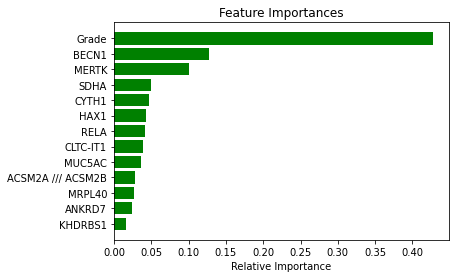

In [3]:
importances = cls.feature_importances_
indices = np.argsort(importances)
df = pd.DataFrame(X)
features = df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


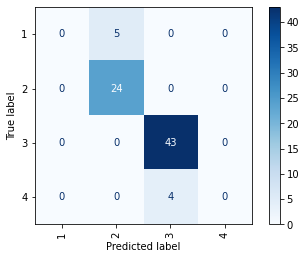

In [5]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
class_names = ['1', '2', '3', '4']
disp = plot_confusion_matrix(cls, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')

In [6]:
y.value_counts()

3    151
2    117
1     19
4     15
Name: Grade, dtype: int64

In [7]:
!pip install shap

import shap  # package used to calculate Shap values

explainer = shap.TreeExplainer(cls)
shap_values = explainer.shap_values(X)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 4.9 MB/s 


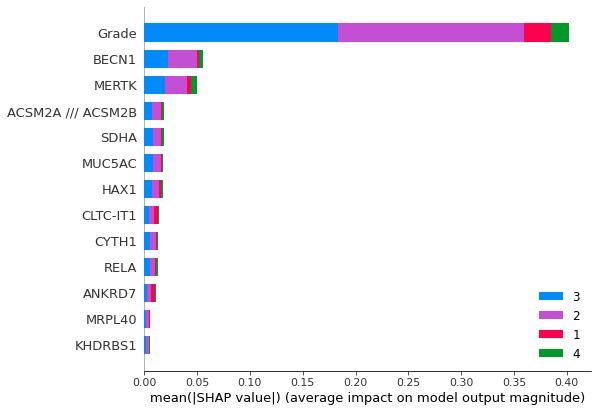

In [8]:
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns)

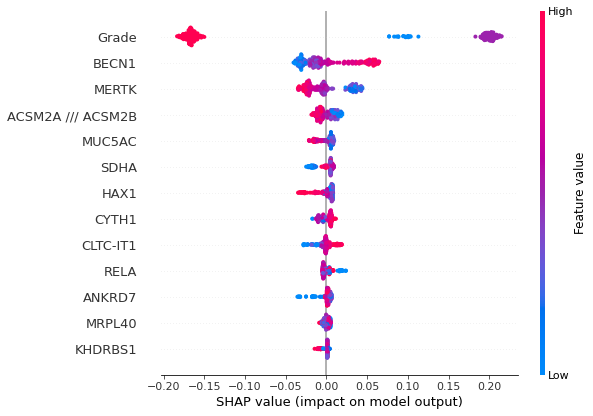

In [9]:
shap.summary_plot(shap_values[1], X.values, feature_names = X.columns)

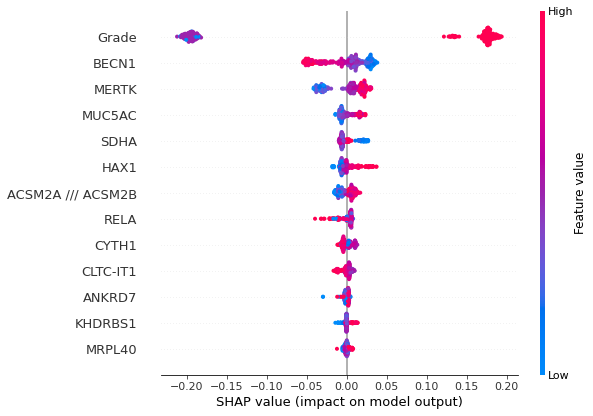

In [10]:
shap.summary_plot(shap_values[2], X.values, feature_names = X.columns)

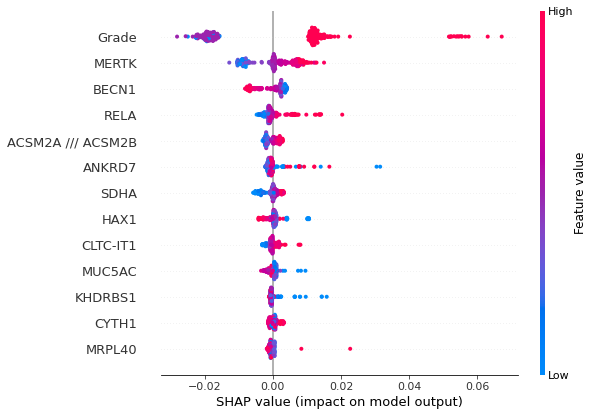

In [11]:
shap.summary_plot(shap_values[3], X.values, feature_names = X.columns)

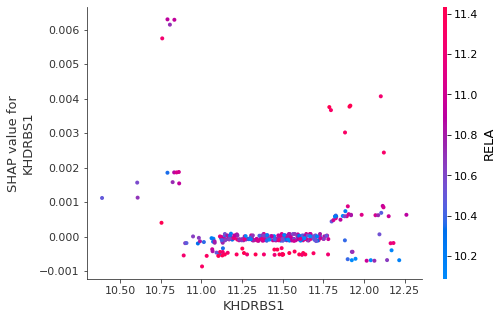

In [12]:
shap.dependence_plot(0, shap_values[0], X.values, feature_names=X.columns)

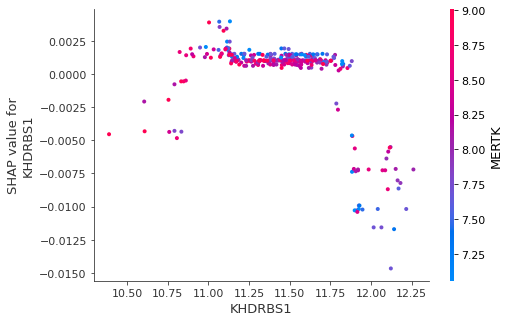

In [13]:
shap.dependence_plot(0, shap_values[1], X.values, feature_names=X.columns)

In [14]:
i=8
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X.values[i], feature_names = X.columns)

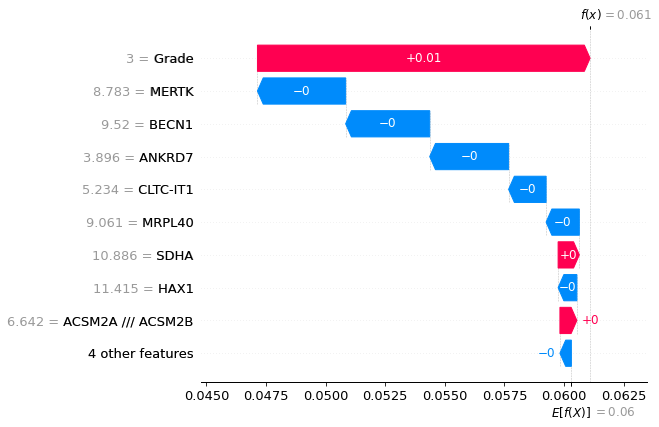

In [15]:
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))